# Исследование данных сервиса аренды самокатов GoFast.

## Описание проекта

В нашем распоряжении данные популярного сервиса аренды самокатов GoFast. Данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
  
  
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

## Цель проекта

Необходимо проанализировать данные и проверить следующие гипотезы:
- тратят ли пользователи с подпиской больше времени на поездки?
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

## План работы

1. Загрузка данных.
2. Предварительная обработка.
3. Исслдовательский анализ.
4. Объединение данных.
5. Подсчет помесячной выручки на каждого клиента.
6. Проверка гипотез.

## Описание данных

Датафрейм **Пользователи**

- **user_id** -	уникальный идентификатор пользователя
- **name** -	имя пользователя
- **age** -	возраст
- **city** -	город
- **subscription_type** -	тип подписки (free, ultra)

-------------------------------------------------------------------------
Датафрейм **Поездки**

- **user_id** -	уникальный идентификатор пользователя
- **distance** -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- **duration** -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- **date** -	дата совершения поездки

-------------------------------------------------------------------------
Датафрейм **Подписки**

- **subscription_type** -	тип подписки
- **minute_price** -	стоимость одной минуты поездки по данной подписке
- **start_ride_price** -	стоимость начала поездки
- **subscription_fee** -	стоимость ежемесячного платежа

## Настройка окружения

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Загрузка данных

### Загрузка данных

In [2]:
# создадим функцию вывода информации о датасетах
def dataset_info(dataset):
    print(dataset.info())
    display(dataset.head(10))

In [3]:
# загрузим предоставленные датасеты
try:
    data_user = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_subs = pd.read_csv('', sep='\t')
except:
    data_user = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    data_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [4]:
# настраиваем полное отображение таблиц
pd.set_option('display.max_columns', None)

### Описание загруженных данных

#### Пользователи

In [5]:
# выводим таблицу и данные по ней
dataset_info(data_user)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
data_user['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Данные загрузились корректно. Всего в датафрейме 5 столбцов и 1565 строк. Данные представлены по следующим городам: 'Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'. Типы данных корректны.

#### Поездки

In [7]:
# выводим таблицу и данные по ней
dataset_info(data_rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Данные загрузились корректно. Всего в датафрейме 4 столбца и 18078 строк. Данные в столбце дат имеют тип object, типы данных в остальных столбцах корркетны.

#### Подписки

In [8]:
# выводим таблицу и данные по ней
dataset_info(data_subs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные загрузились корректно. Всего в датафрейме 4 столбца и 2 строки. Типы данных корректны.

### ВЫВОД
Заказчиком предоставлены данные сервиса аренды самокатов GoFast. Данные представляют из себя три датасета. Все данные были загружены без ошибок. Информация о полученных датафреймах:

- *Пользователи.* Всего в датафрейме 5 столбцов и 1565 строк. Данные представлены по следующим городам: 'Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'. Типы данных корректны;


- *Поездки.* Всего в датафрейме 4 столбца и 18078 строк. Данные в столбце дат имеют тип object, типы данных в остальных столбцах корркетны;


- *Подписки.* Всего в датафрейме 4 столбца и 2 строки. Типы данных корректны.

## Предобработка данных

In [9]:
# создаем функцию для проверки на дубликаты и пропуски
def dataset_dub_null(dataset):
    print('Количество явных дубликатов:', dataset.duplicated().sum())
    print('Количество пропусков:', dataset.isnull().sum())

### Пользователи

In [10]:
# проверяем на дубликаты и пропуски
dataset_dub_null(data_user)

Количество явных дубликатов: 31
Количество пропусков: user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Явных дубликатов - 31, пропуски отстутсвуют. Удалим явные дубликатыэ

In [11]:
# Удаляем явные дубликаты
data_user.drop_duplicates(inplace=True)
# убедимся, что дубликаты удалены
dataset_dub_null(data_user)

Количество явных дубликатов: 0
Количество пропусков: user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Удаление прошло успешно. Проверим данные на неявные дубликаты в столбцах с типом 'object'. Это имеет смысл для столбцов с данными по городам и типу подписки. По имени пользователя - смысла не имеет.

In [12]:
data_user['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В данном столбце неявные дубликаты отстутствуют.

In [13]:
data_user['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

В данном столбце неявные дубликаты отстутствуют.

### Поездки

In [14]:
# проверяем на дубликаты и пропуски
dataset_dub_null(data_rides)

Количество явных дубликатов: 0
Количество пропусков: user_id     0
distance    0
duration    0
date        0
dtype: int64


Явные дубликаты и пропуски отстутствуют. Приведем тип данных в столбце date к DataTime

In [15]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [16]:
# оценим период за который представленны данные
print('Первый день из выборки:', data_rides['date'].min())
print('Последний день из выборки:', data_rides['date'].max())

Первый день из выборки: 2021-01-01 00:00:00
Последний день из выборки: 2021-12-30 00:00:00


Рассматриваемый период с 1 января по 30 марта 2021 года.

In [17]:
# Добавим столбец с номером месяца
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Подписики

In [18]:
# проверяем на дубликаты и пропуски
dataset_dub_null(data_subs)

Количество явных дубликатов: 0
Количество пропусков: subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Явные дубликаты и пропуски отстутствуют. Проверим на неявные дубликаты стобец с типом подписки.

In [19]:
data_subs['subscription_type'].unique()

array(['free', 'ultra'], dtype=object)

Неявные дубликаты отстутствуют.

### ВЫВОД
Была проведена предварительная обработка данных:

- *Пользователи.* Пропуски отсутствуют, удалено 31 явных дубликатов, неяные дубликаты отстуствуют;


- *Поездки.* Пропуски отсутствуют, явные дубликаты отсутствуют, изменен тип данных в столбце со значнием дат на  DataTime. Определено, что данные предоставлены за период с 1 января по 30 марта 2021 года.;


- *Подписки.* Пропуски отсутствуют, явные и неявные дубликаты отсутствуют.

## Исследовательский анализ данных

### Частота встречаемости городов

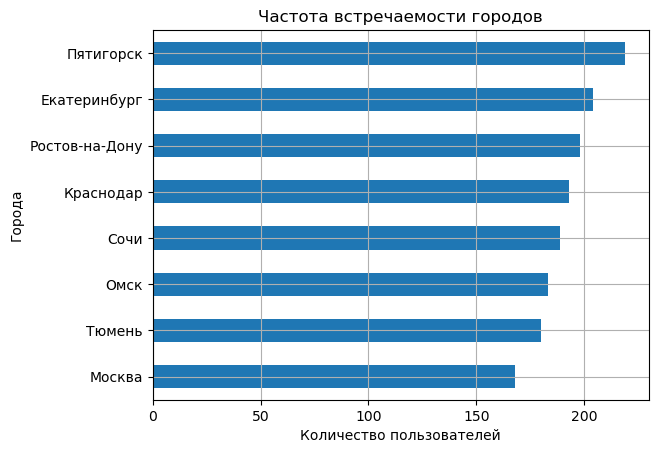

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [20]:
# определим частоту встречаемости городов, выведем в табличном виде и построим барплот
data_user['city'].value_counts().sort_values(ascending=True).plot(kind='barh', grid=True);
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()
display(data_user['city'].value_counts().sort_values(ascending=False))

- данные представлены по 8 городам;
- в представленной выборке больше всего пользователей в Пятигоске - 219 человек, меньше всего в Москве - 168 человек;
- аномальные значения отсутствуют.

### Соотношение пользователей с подпиской и без неё

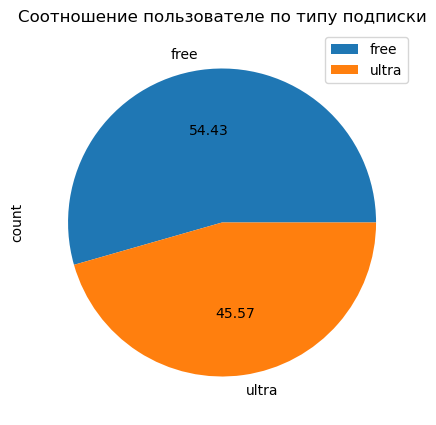

subscription_type
free     835
ultra    699
Name: count, dtype: int64

In [21]:
# определим частоту количество пользователей с подпиской и без, выведем в табличном виде и построим барплот
data_user['subscription_type'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5, 5), legend=True);
plt.title('Соотношение пользователе по типу подписки')
plt.show()
display(data_user['subscription_type'].value_counts().sort_values(ascending=False))

Пользователей без подписки больше чем пользователей с подпиской: 54 и 46 %, соотвественно.

### Возраст пользователей

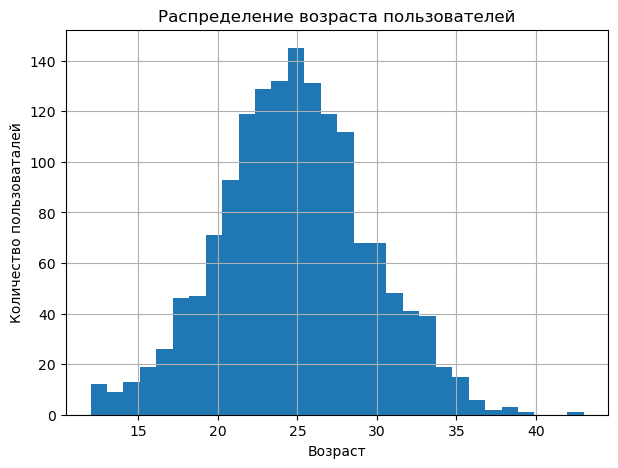

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [22]:
# определим количество пользователей по возрасту построим гистограмму
data_user['age'].plot(kind='hist', grid=True, bins=30, figsize=(7, 5));
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользоваталей')
plt.show()
data_user['age'].describe()

Выборка имеет нормальное распределение, медиана и среднее практически совпадают, и составляют 25 лет. Явных выбросов нет, максимальное значение - 43 года. Основная часть данных сосредоточена в интервале 18-34 лет.

### Расстояние, которое пользователь преодолел за одну поездку.

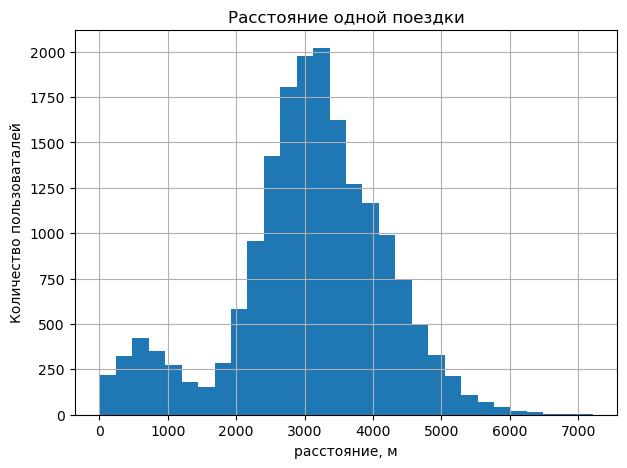

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [23]:
# определим количество пользователей по преодоленному расстоянию построим гистограмму
data_rides['distance'].plot(kind='hist', grid=True, bins=30, figsize=(7, 5));
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('Количество пользоваталей')
plt.show()
data_rides['distance'].describe()

Медианное значение большинства поездок порядка 3.1 км., явных выбросов нет. Основная часть данных лежит в интервале 2.2 - 4.4 км. Есть небольшой всплеск значений в интервале 250 - 1200 метров, то может быть связанно с поездками до/от остановок общественного траспорта.

### Продолжительность поездок

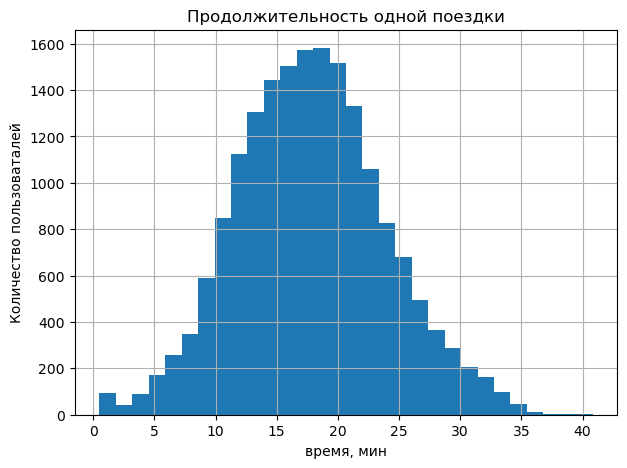

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [24]:
# определим количество пользователей по продолжительности поездок и построим гистограмму
data_rides['duration'].plot(kind='hist', grid=True, bins=30, figsize=(7, 5));
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('Количество пользоваталей')
plt.show()
data_rides['duration'].describe()

Данные имеют нормальное распределение, явные выбросы отстутствуют. Среднее время поездки - 17.8 мин. 

### Вывод
Был проведен исследовательский анализ данных. Установлены следующие факты:
- *Частота встречаемости городов:*
  - данные представлены по 8 городам;
  - в представленной выборке больше всего пользователей в Пятигоске - 219 человек, меньше всего в Москве - 168 человек;
  - аномальные значения отсутствуют.
  
  
- *Соотношение пользователей с подпиской и без неё:*
  - Пользователей без подписки больше чем пользователей с подпиской: 54 и 46 %, соотвественно.


- *Возраст пользователей:*
  - Выборка имеет нормальное распределение, медиана и среднее практически совпадают, и составляют 25 лет. Явных выбросов нет, максимальное значение - 43 года. Основная часть данных сосредоточена в интервале 18-34 лет.
  
  
- *Расстояние, которое пользователь преодолел за одну поездку:*
  - Медианное значение большинства поездок порядка 3.1 км., явных выбросов нет. Основная часть данных лежит в интервале 2.2 - 4.4 км. Есть небольшой всплеск значений в интервале 250 - 1200 метров, то может быть связанно с поездками до/от остановок общественного траспорта.
  
  
- *Продолжительность поездок:*
  - Данные имеют нормальное распределение, явные выбросы отстутствуют. Среднее время поездки - 17.8 мин.

## Объединение данных

### Объединие данные о пользователях, поездках и подписках.

In [25]:
# создаем объединенную таблицу
data_mrg = data_rides.merge(data_user, on='user_id', how='left')
data_mrg = data_mrg.merge(data_subs, on='subscription_type', how='left')
data_mrg

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [26]:
# проверим на дубликаты и пропуски
dataset_dub_null(data_mrg)

Количество явных дубликатов: 0
Количество пропусков: user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


### Создание датафрейма с данными о пользователях без подписки.

In [27]:
# отфильтруем общую таблицу по пользователям без подписки и содадим отдельный датафрейм
data_free_subs = data_mrg.loc[data_mrg['subscription_type'] == 'free']
data_free_subs.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


### Создание датафрейма с данными о пользователях с подпиской.

In [28]:
# отфильтруем общую таблицу по пользователям с подпиской и содадим отдельный датафрейм
data_ultra_subs = data_mrg.loc[data_mrg['subscription_type'] == 'ultra']
data_ultra_subs.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [29]:
# проверяем, что все строки попали в оба датафрейма
data_mrg.shape[0] - data_free_subs.shape[0] - data_ultra_subs.shape[0]

0

### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий (с подпиской и без)

#### Расстояние поездки

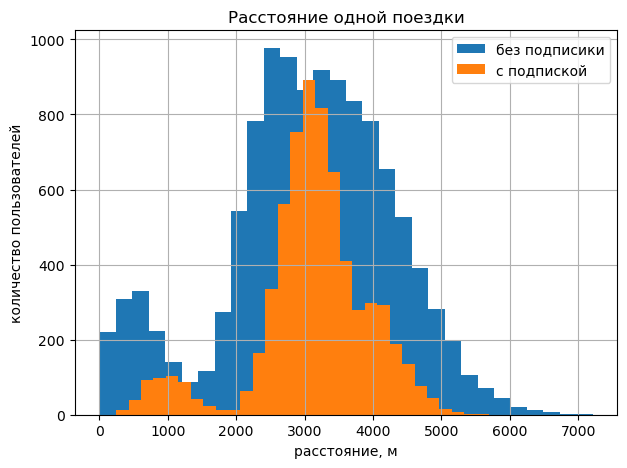

In [30]:
data_free_subs['distance'].plot(kind='hist', grid=True, figsize=(7, 5), bins=30, label='без подписики')
data_ultra_subs['distance'].plot(kind='hist', grid=True, figsize=(7, 5), bins=30, label='с подпиской')
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

Из визуализации видно, что расстояние одной поездки пользователей без подписки большем чем пользователей с подпиской.

#### Время поездки

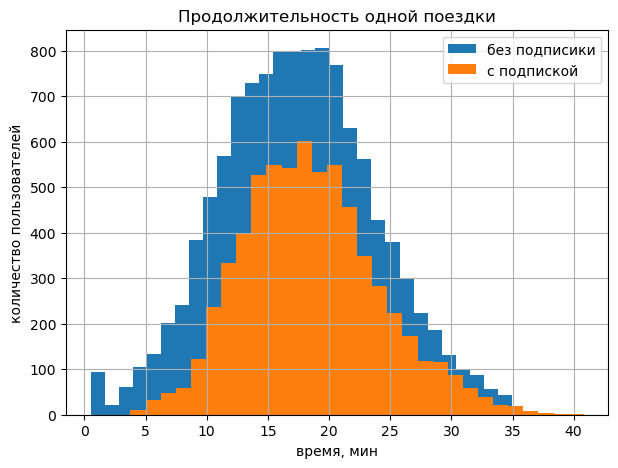

In [31]:
data_free_subs['duration'].plot(kind='hist', grid=True, figsize=(7, 5), bins=30, label='без подписики')
data_ultra_subs['duration'].plot(kind='hist', grid=True, figsize=(7, 5), bins=30, label='с подпиской')
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

Из визуализации видно, что время одной поездки пользователей без подписки большем чем пользователей с подпиской.

### Вывод
На данном этапе была проделаны следующие работы:
- Создан общий датафрейм на основе трех первоначальных;


- Созданы два датафрейма с данными о пользователях с подпиской и без подписки;


- Построены визуализации данных из датафреймов о пользователях с подпиской и без подписки, отмечено что:
  - расстояние одной поездки пользователей без подписки большем чем пользователей с подпиской;
  - время одной поездки пользователей без подписки большем чем пользователей с подпиской.

##  Подсчёт выручки

Создаем датафрейм с агрегированными данными о поездках на основе датафрейма data_mrg: находим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [32]:
# делаем сводную таблицу по интересующим величинам, суммируем
data_mrg_agg = data_mrg.pivot_table(index=['user_id', 'month', 'subscription_type'], values=('duration', 'distance'), aggfunc='sum')
# добавляем столбец с количеством поездок
data_mrg_agg['rides_count'] = data_mrg.pivot_table(index=['user_id', 'month'], values='distance', aggfunc='count')
# переименовываем столбцы
data_mrg_agg = data_mrg_agg.rename(columns={'distance':'distance_sum', 'duration':'duration_sum'})
# перезаписываем индексы в полученной таблице
data_mrg_agg = data_mrg_agg.reset_index()
data_mrg_agg

,user_id,month,subscription_type,distance_sum,duration_sum,rides_count
0,1,1,ultra,7027.511294,41.416640,2
1,1,4,ultra,754.159807,6.232113,1
2,1,8,ultra,6723.470560,44.776802,2
3,1,10,ultra,5809.911100,31.578017,2
4,1,11,ultra,7003.499363,53.397424,3
...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,24.812678,2
11327,1534,8,free,7622.453034,47.205960,2
11328,1534,9,free,4928.173852,22.560373,1
11329,1534,11,free,13350.015305,76.342174,4


**Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь**


In [33]:
# округляем время поездки до ближайшего целого
data_mrg_agg['duration_sum'] = np.ceil(data_mrg_agg['duration_sum'])
# создаем вспомогательную таблицу для рассчетов
data_mrg_agg1 = data_mrg.pivot_table(index=['user_id', 'month'], values=('minute_price', 'start_ride_price','subscription_fee'))
# перезаписываем индексы в спомогательной таблице
data_mrg_agg1 = data_mrg_agg1.reset_index()
data_mrg_agg1

,user_id,month,minute_price,start_ride_price,subscription_fee
0,1,1,6.0,0.0,199.0
1,1,4,6.0,0.0,199.0
2,1,8,6.0,0.0,199.0
3,1,10,6.0,0.0,199.0
4,1,11,6.0,0.0,199.0
...,...,...,...,...,...
11326,1534,6,8.0,50.0,0.0
11327,1534,8,8.0,50.0,0.0
11328,1534,9,8.0,50.0,0.0
11329,1534,11,8.0,50.0,0.0


In [34]:
# добавляем в основную таблицу столбец выручки, с использованием данных 
data_mrg_agg['income'] = data_mrg_agg1['start_ride_price'] * data_mrg_agg['rides_count'] + \
data_mrg_agg1['minute_price'] * data_mrg_agg['duration_sum'] + data_mrg_agg1['subscription_fee']
data_mrg_agg

,user_id,month,subscription_type,distance_sum,duration_sum,rides_count,income
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,4,ultra,754.159807,7.0,1,241.0
2,1,8,ultra,6723.470560,45.0,2,469.0
3,1,10,ultra,5809.911100,32.0,2,391.0
4,1,11,ultra,7003.499363,54.0,3,523.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,25.0,2,300.0
11327,1534,8,free,7622.453034,48.0,2,484.0
11328,1534,9,free,4928.173852,23.0,1,234.0
11329,1534,11,free,13350.015305,77.0,4,816.0


## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Сравним две выборки data_ultra_subs и data_free_subs для проверки гипотезы. Две независимые выборки. Будем использовать метод st.ttest_ind()


- Нулевая гипотеза:среднее время одной поездки одинаково для пользователей с подпиской и без неё;
- Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездку.

In [35]:
# задаем уровень статистической значимости
alpha = 0.05
# так как у нас правосторонняя альтернативная гипотеза, используем соотвествующий аргумент метода st.ttest_ind
results = st.ttest_ind(data_ultra_subs['duration'], data_free_subs['duration'], alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Нулевую гипотезу отвергнуть нельзя.')
    
# выведем средние значения для обеих категорий пользователей    
print('Среднее время поездки пользователей с подпиской:', round(data_ultra_subs['duration'].mean(), 2))
print('Среднее время поездки без подписки:', round(data_free_subs['duration'].mean(), 2))

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.
Среднее время поездки пользователей с подпиской: 18.54
Среднее время поездки без подписки: 17.39


По результатам проведенного теста можно сказать, что нулевая гипотеза о равенстве среднего времени одной поездки для пользователей с подпиской и без подписки - отвергнута. Следовательно принимаем алтернативную - пользователи с подпиской тратят больше времени на поездку. 

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Одна выборка, сравниваем среднего с заданным числом. Будем использовать метод st.ttest_1samp()


- Нулевая гипотеза:среднее расстояние поездки пользователя с подпиской равно 3130 метрам;
- Альтернативная гипотеза: среднее расстояние поездки пользователя с подпиской больше 3130 метров.

In [36]:
# интересующее значение
interested_value = 3130
# уровень статистичекой значимости
alpha = 0.05

# так как у нас правосторонняя альтернативная гипотеза, используем соотвествующий аргумент метода st.ttest_1samp
results = st.ttest_1samp(data_ultra_subs['distance'], interested_value, alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Нулевую гипотезу отвергнуть нельзя.')
# выведем среднее значение параметра
print('Средняя дистанция поездки пользователей с подпиской:', round(data_ultra_subs['distance'].mean(), 0))

p-value: 0.9195368847849785
Нулевую гипотезу отвергнуть нельзя.
Средняя дистанция поездки пользователей с подпиской: 3115.0


По результатам проведенного теста можно сказать, что нулевую гипотезу о равенстве среднего расстояния поездки пользователя с подпиской 3130 метрам - отвергнуть нельзя.

###  Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Будем сравнивать две независимые выборки. Используем метод st.ttest_ind()

- Нулевая гипотеза: помесячная выручка пользователей с подпиской и без неё одинакова;
- Альтернативная гипотеза: помесячная выручка пользователей с подпиской больше.

In [37]:
# создадим датафрейм с информацией по пользователям с подпиской
data_mrg_agg_ultra = data_mrg_agg[data_mrg_agg['subscription_type'] == 'ultra']
data_mrg_agg_ultra

,user_id,month,subscription_type,distance_sum,duration_sum,rides_count,income
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,4,ultra,754.159807,7.0,1,241.0
2,1,8,ultra,6723.470560,45.0,2,469.0
3,1,10,ultra,5809.911100,32.0,2,391.0
4,1,11,ultra,7003.499363,54.0,3,523.0
...,...,...,...,...,...,...,...
4528,699,6,ultra,4072.797406,17.0,1,301.0
4529,699,8,ultra,7018.324143,45.0,2,469.0
4530,699,9,ultra,6364.861911,31.0,2,385.0
4531,699,10,ultra,4707.845501,16.0,1,295.0


In [38]:
# создадим датафрейм с информацией по пользователям без подписки
data_mrg_agg_free = data_mrg_agg[data_mrg_agg['subscription_type'] == 'free']
data_mrg_agg_free

,user_id,month,subscription_type,distance_sum,duration_sum,rides_count,income
4533,700,1,free,2515.690719,15.0,1,170.0
4534,700,2,free,13446.659764,86.0,5,938.0
4535,700,3,free,3798.334905,19.0,1,202.0
4536,700,4,free,2984.551206,16.0,1,178.0
4537,700,6,free,5927.650988,29.0,2,332.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409.468534,25.0,2,300.0
11327,1534,8,free,7622.453034,48.0,2,484.0
11328,1534,9,free,4928.173852,23.0,1,234.0
11329,1534,11,free,13350.015305,77.0,4,816.0


In [39]:
# проверим что не потеряли строки
data_mrg_agg.shape[0] - data_mrg_agg_ultra.shape[0] - data_mrg_agg_free.shape[0]

0

In [40]:
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(data_mrg_agg_ultra['income'], data_mrg_agg_free['income'], alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Нулевую гипотезу отвергнуть нельзя.')
    
# выведем средние значения    
print('Средняя помесячная прибыль пользователей с подпиской:', round(data_mrg_agg_ultra['income'].mean(), 2))
print('Среднее помесячная прибыль пользователей без подписки:', round(data_mrg_agg_free['income'].mean(), 2))

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу.
Средняя помесячная прибыль пользователей с подпиской: 361.48
Среднее помесячная прибыль пользователей без подписки: 325.84


По результатам проведенного теста можно сказать, что нулевая гипотеза о равенстве помесячной выручки пользователей с подпиской и без - отвергнута. Следовательно принимаем алтернативную - помесячная выручка пользователей с подпиской больше. 

### Количество обращений в техподдержку

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

***Ответ:*** В данном случае нужно применить тест проверки гипотез о равенстве средних для зависимых парных выборок. В метод scipy.stats.ttest_rel() передать наборы данных до и после обновления сервера.

### Вывод
В результате проверки гипотез можно отметить следующее:
- Гипотеза о том, что пользователи с подпиской тратят в среднем больше времени на поездку подтвердилась.
Среднее время поездки пользователей с подпиской: 18.54
Среднее время поездки без подписки: 17.39


- Гипотеза о том, что среднее расстояние поездки пользователей с подпиской не превышает3130 м, подттвердилась
Средняя дистанция поездки пользователей с подпиской: 3115.0


- Гипотеза о том, что средняя помесячная выручка пользователей с подпиской выше, чем пользователей без подписки подтверждается.
Средняя помесячная прибыль пользователей с подпиской: 361.48
Среднее помесячная прибыль пользователей без подписки: 325.84

## Общий вывод

### Информация о данных и предварительной обработке

Заказчиком предоставлены данные сервиса аренды самокатов GoFast. Данные представляют из себя три датасета. Все данные были загружены без ошибок. Информация о полученных датафреймах:

- *Пользователи.* Всего в датафрейме 5 столбцов и 1565 строк. Данные представлены по следующим городам: 'Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'. Типы данных корректны;


- *Поездки.* Всего в датафрейме 4 столбца и 18078 строк. Данные в столбце дат имеют тип object, типы данных в остальных столбцах корркетны;


- *Подписки.* Всего в датафрейме 4 столбца и 2 строки. Типы данных корректны.


Была проведена предварительная обработка данных:

- *Пользователи.* Пропуски отсутствуют, удалено 31 явных дубликатов, неяные дубликаты отстуствуют;


- *Поездки.* Пропуски отсутствуют, явные дубликаты отсутствуют, изменен тип данных в столбце со значнием дат на  DataTime. Определено, что данные предоставлены за период с 1 января по 30 марта 2021 года.;


- *Подписки.* Пропуски отсутствуют, явные и неявные дубликаты отсутствуют.




### Исследование данных

Был проведен исследовательский анализ данных. Установлены следующие факты:
- *Частота встречаемости городов:*
  - данные представлены по 8 городам;
  - в представленной выборке больше всего пользователей в Пятигоске - 219 человек, меньше всего в Москве - 168 человек;
  - аномальные значения отсутствуют.
  
  
- *Соотношение пользователей с подпиской и без неё:*
  - Пользователей без подписки больше чем пользователей с подпиской: 54 и 46 %, соотвественно.


- *Возраст пользователей:*
  - Выборка имеет нормальное распределение, медиана и среднее практически совпадают, и составляют 25 лет. Явных выбросов нет, максимальное значение - 43 года. Основная часть данных сосредоточена в интервале 18-34 лет.
  
  
- *Расстояние, которое пользователь преодолел за одну поездку:*
  - Медианное значение большинства поездок порядка 3.1 км., явных выбросов нет. Основная часть данных лежит в интервале 2.2 - 4.4 км. Есть небольшой всплеск значений в интервале 250 - 1200 метров, то может быть связанно с поездками до/от остановок общественного траспорта.
  
  
- *Продолжительность поездок:*
  - Данные имеют нормальное распределение, явные выбросы отстутствуют. Среднее время поездки - 17.8 мин.

### Объединение данных

На данном этапе была проделаны следующие работы:
- Создан общий датафрейм на основе трех первоначальных;


- Созданы два датафрейма с данными о пользователях с подпиской и без подписки;


- Построены визуализации данных из датафреймов о пользователях с подпиской и без подписки, отмечено что:
  - расстояние одной поездки пользователей без подписки большем чем пользователей с подпиской;
  - время одной поездки пользователей без подписки большем чем пользователей с подпиской.

### Подсчет выручки

Создан датафрейм со столбцом помесячной выручки для каждого пользователя.

### Проверка гипотез

В результате проверки гипотез можно отметить следующее:
- По результатам проведенного  нулевая гипотеза о равенстве среднего времени одной поездки для пользователей с подпиской и без подписки - отвергнута. Приняли алтернативную - пользователи с подпиской тратят больше времени на поездку. 
Среднее время поездки пользователей с подпиской: 18.54
Среднее время поездки без подписки: 17.39


- По результатам проведенного теста нулевую гипотезу о равенстве среднего расстояния поездки пользователя с подпиской 3130 метрам - отвергнуть нельзя.
Средняя дистанция поездки пользователей с подпиской: 3115.0


- По результатам проведенного теста нулевая гипотеза о равенстве помесячной выручки пользователей с подпиской и без - отвергнута. Следовательно принимаем алтернативную - помесячная выручка пользователей с подпиской больше. 
Средняя помесячная прибыль пользователей с подпиской: 361.48
Среднее помесячная прибыль пользователей без подписки: 325.84

### Рекомедации

Рекомендую обратить внимание на привлечение пользователей к оформлению подписки на сервис.